# ALL-IDB Dataset Recognition 
###  → See Section 6 in Master Thesis : "Identification of Leukemia Subtypes" 

## • Imports & preprocessing 

In [100]:
# This Python 3 environment comes with many helpful anal,ytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import backend as K

import matplotlib.pyplot as plt

import allidb1_preproc

In [101]:
# Resize img folder (size divided by 10)
#preprocess.resize_folder("Datasets/ALL_IDB1/im")

# Create CSV from img folder
myFileList = allidb1_preproc.createFileList('ALL_IDB2/resized_im_data_aug') 
#allidb1_preproc.data_to_CSV(myFileList) # Uncomment to create the CSV file 

# get Y labels from the data 
myFileListForY = allidb1_preproc.createFileList('ALL_IDB2/resized_im_data_aug') # ne met pas les images dans l'ordre donc y erroné#
y = allidb1_preproc.get_yLabels(myFileListForY)
#y = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
print(y)

ALL_IDB2/resized_im_data_aug
ALL_IDB2/resized_im_data_aug
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [

## • Training set & test set definition

In [102]:
# Read training and test data files
data = pd.read_csv("resizedALLIDB2-data_aug.csv")
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2) 


print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

X_train = X_train.values
X_test = X_test.values 


X_train:

       0    1    2    3    4    5    6    7    8    9  ...  9990  9991  9992  \
216  150  150  150  151  152  153  155  157  158  156  ...   140   143   160   
429  105  102  101  100   99  100  101   98   97   97  ...   105   106   105   
267  160  164  153  135  134  133  132  136  138  139  ...   159   159   157   
1    223  225  226  224  223  224  228  232  232  230  ...   235   235   235   
3    128  128  127  128  130  132  134  135  137  137  ...   123   120   118   

     9993  9994  9995  9996  9997  9998  9999  
216   166   163   159   160   160   160   160  
429   105   105   104   104   102    99    98  
267   158   160   161   162   166   145   127  
1     235   235   235   234   234   234   234  
3     116   114   113   111   111   111   111  

[5 rows x 10000 columns]
(369, 10000)

X_test:

       0    1    2    3    4    5    6    7    8    9  ...  9990  9991  9992  \
22   127  127  131  141  152  158  161  164  166  166  ...   155   155   154   
374  125  1

In [103]:
print(len(X_train))
print(len(y_train))

369
369


In [104]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
trainX = X_train.reshape(X_train.shape[0],1,100, 100).astype( 'float32' )
X_train = trainX / 255.0 

testX = X_test.reshape(X_test.shape[0],1,100, 100).astype( 'float32' )
X_test = testX / 255.0 

In [105]:
# specify the number of classes that are in the dataset, so we know how many neurons to compress the final layer down to 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

class_num = y_test.shape[1]

## • Creating the CNN

In [106]:
model = Sequential()
K.common.set_image_dim_ordering('th')

dropoutValue = 0.1 # why bad? https://stats.stackexchange.com/questions/299292/dropout-makes-performance-wors

model.add(Convolution2D(32, (3, 3), input_shape=(1, 100, 100), activation= 'relu' ))
model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), activation= 'relu' ))
model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation= 'relu' ))
model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())
model.add(Dense(64, activation= 'relu' ))
model.add(Dropout(dropoutValue)) 
model.add(BatchNormalization())
model.add(Dense(class_num, activation= 'softmax' ))

In [107]:
 # Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 98, 98)        320       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 98, 98)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 98, 98)        392       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 49, 49)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 47, 47)        18496     
_________________________________________________________________
dropout_18 (Dropout)         (None, 64, 47, 47)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 64, 47, 47)        188       
__________

In [108]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25,batch_size=32)

Train on 369 samples, validate on 93 samples
Epoch 1/25
369/369 [==============================] - 18s 48ms/step - loss: 0.7736 - acc: 0.6531 - val_loss: 0.6420 - val_acc: 0.6989
Epoch 2/25
369/369 [==============================] - 15s 41ms/step - loss: 0.6240 - acc: 0.6667 - val_loss: 0.8389 - val_acc: 0.6667
Epoch 3/25
369/369 [==============================] - 15s 40ms/step - loss: 0.5611 - acc: 0.7344 - val_loss: 1.2870 - val_acc: 0.6559
Epoch 4/25
369/369 [==============================] - 15s 41ms/step - loss: 0.5846 - acc: 0.6938 - val_loss: 0.9044 - val_acc: 0.6022
Epoch 5/25
369/369 [==============================] - 15s 41ms/step - loss: 0.6248 - acc: 0.6721 - val_loss: 9.7055 - val_acc: 0.3978
Epoch 6/25
369/369 [==============================] - 15s 40ms/step - loss: 0.6884 - acc: 0.6314 - val_loss: 0.8137 - val_acc: 0.6667
Epoch 7/25
369/369 [==============================] - 15s 42ms/step - loss: 0.5427 - acc: 0.7534 - val_loss: 1.1562 - val_acc: 0.6022
Epoch 8/25
369/36

In [109]:
# Model evaluation
_, acc = model.evaluate(X_test, y_test)
print('accuracy > %.3f' % (acc * 100.0))

93/93 [==============================] - 1s 9ms/step
accuracy > 60.215


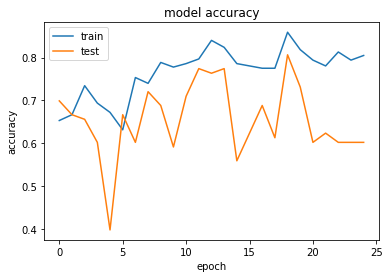

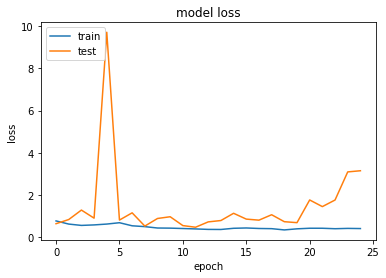

In [110]:
# plot diagnostic learning curves
def summarize_diagnostics_by_epochs(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss --> https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

summarize_diagnostics_by_epochs(history)

---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------

## --- Results accuracy ---


### • ALL-IDB1 (train set = 86 imgs, test set = 22 imgs)

→ Preprocessing: size reduced to 100x100 | On 25 epochs and 32 batch size 

#### Baseline results (no dropout, no data augmentation) with color: 
- Run 1: <i>Train set:</i> 100.00% | <i>Test set:</i> 81.818%
- Run 2: <i>Train set:</i> 100.00% | <i>Test set:</i> 72.727%
- Run 3: <i>Train set:</i> 100.00% | <i>Test set:</i> 63.64%   
- Run 4: <i>Train set:</i> 100.00% | <i>Test set:</i> 81.82%
- Run 5: <i>Train set:</i> 100.00% | <i>Test set:</i> 72.73%
- <b>Average:</b> <i>Train set:</i> <b>100.00%</b> | <i>Test set:</i> <b>74.54%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb1-baseline.png">

#### Baseline results (no dropout, no data augmentation) with greyscale:
- Run 1: <i>Train set:</i> 100.00% | <i>Test set:</i> 45.455% 
- Run 2: <i>Train set:</i> 100.00% | <i>Test set:</i> 50.00%
- Run 3: <i>Train set:</i> 100.00% | <i>Test set:</i> 72.72% 
- Run 4: <i>Train set:</i> 100.00% | <i>Test set:</i> 54.54%
- Run 5: <i>Train set:</i> 100.00% | <i>Test set:</i> 59.09%
- <b>Average:</b> <i>Train set:</i> <b>100.00%</b> | <i>Test set:</i> <b>56.36%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb1-grey.png">

#### Dropout of 0.1:
- Run 1: <i>Train set:</i> 63.95% | <i>Test set:</i> 59.091%
- Run 2: <i>Train set:</i> 66.28% | <i>Test set:</i> 68.18%
- Run 3: <i>Train set:</i> 59.30% | <i>Test set:</i> 63.63%  
- Run 4: <i>Train set:</i> 62.79% | <i>Test set:</i> 59.09%
- Run 5: <i>Train set:</i> 68.60% | <i>Test set:</i> 54.545%
- <b>Average:</b> <i>Train set:</i> <b>64.18%</b> | <i>Test set:</i> <b>60.9%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb1-dropout.png">

#### With data augmentation (Train set = 172 imgs, test set = 44 imgs): 
- Run 1: <i>Train set:</i> 100.00% | <i>Test set:</i> 61.364%  
- Run 2: <i>Train set:</i> 99.42% | <i>Test set:</i> 56.818%
- Run 3: <i>Train set:</i> 99.42% | <i>Test set:</i> 61.364%
- Run 4: <i>Train set:</i> 97.67% | <i>Test set:</i> 70.45%
- Run 5: <i>Train set:</i> 100.00% | <i>Test set:</i> 72.73%
- <b>Average:</b> <i>Train set:</i> <b>99.3%</b> | <i>Test set:</i> <b>64.54%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb1-data_aug.png">

#### With dropout and data augmentation: 
- Run 1: <i>Train set:</i> 59.30% | <i>Test set:</i> 54.545%
- Run 2: <i>Train set:</i> 61.05% | <i>Test set:</i> 52.273%
- Run 3: <i>Train set:</i> 67.44% | <i>Test set:</i> 68.18% 
- Run 4: <i>Train set:</i> 70.35% | <i>Test set:</i> 65.91%
- Run 5: <i>Train set:</i> 68.60% | <i>Test set:</i> 75.00% 
- <b>Average:</b> <i>Train set:</i> <b>65.34%</b> | <i>Test set:</i> <b>63.18%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb1-data_aug_and_dropout.png">

----------------------------------------------------------------------------------------------

### • ALL-IDB2 (train set = 208 imgs, test set = 52 imgs)

→ Preprocessing: size reduced to 100x100 | On 25 epochs and 32 batch size 

#### Baseline results (no dropout, no data augmentation) with color: 
- Run 1: <i>Train set:</i> 100.00% | <i>Test set:</i> 73.077%
- Run 2: <i>Train set:</i> 99.52% | <i>Test set:</i> 71.154%
- Run 3: <i>Train set:</i> 100.00% | <i>Test set:</i> 57.69% 
- Run 4: <i>Train set:</i> 99.52% | <i>Test set:</i> 55.769%
- Run 5: <i>Train set:</i> 100.00% | <i>Test set:</i> 65.385%
- <b>Average:</b> <i>Train set:</i> <b>99.8%</b> | <i>Test set:</i> <b>64.615%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb2-baseline.png">

#### Baseline results (no dropout, no data augmentation) with greyscale:
- Run 1: <i>Train set:</i> 100.00% | <i>Test set:</i> 82.692%
- Run 2: <i>Train set:</i> 100.00% | <i>Test set:</i> 78.846%
- Run 3: <i>Train set:</i> 100.00% | <i>Test set:</i> 59.615% 
- Run 4: <i>Train set:</i> 100.00% | <i>Test set:</i> 84.615%
- Run 5: <i>Train set:</i> 100.00% | <i>Test set:</i> 67.31%
- <b>Average:</b> <i>Train set:</i> <b>100.00%</b> | <i>Test set:</i> <b>74.61%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb2-grey.png">

#### Dropout of 0.1:
- Run 1: <i>Train set:</i> 82.21% | <i>Test set:</i> 67.308%
- Run 2: <i>Train set:</i> 78.85% | <i>Test set:</i> 53.846%
- Run 3: <i>Train set:</i> 78.37% | <i>Test set:</i> 57.692% 
- Run 4: <i>Train set:</i> 74.52% | <i>Test set:</i> 55.77%
- Run 5: <i>Train set:</i> 77.88% | <i>Test set:</i> 71.15%
- <b>Average:</b> <i>Train set:</i> <b>78.36%</b> | <i>Test set:</i> <b>61.15%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb2-dropout.png">

#### With data augmentation (Train set = 416 imgs, test set = 104 imgs): 
- Run 1: <i>Train set:</i> 98.64% | <i>Test set:</i> 75.269%
- Run 2: <i>Train set:</i> 96.21% | <i>Test set:</i> 87.10%
- Run 3: <i>Train set:</i> 97.29% | <i>Test set:</i>  61.29%
- Run 4: <i>Train set:</i> 98.92% | <i>Test set:</i> 81.720% 
- Run 5: <i>Train set:</i> 99.46% | <i>Test set:</i> 74.194%
- <b>Average:</b> <i>Train set:</i> <b>98.104%</b> | <i>Test set:</i> <b>75.87%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb2-data_aug.png">

#### With dropout and data augmentation: 
- Run 1: <i>Train set:</i> 80.49% | <i>Test set:</i> 60.215%
- Run 2: <i>Train set:</i> 84.01% | <i>Test set:</i> 76.34% 
- Run 3: <i>Train set:</i> 86.18% | <i>Test set:</i> 60.22%
- Run 4: <i>Train set:</i> 81.03% | <i>Test set:</i> 76.34%
- Run 5: <i>Train set:</i> 83.47% | <i>Test set:</i> 67.74%
- <b>Average:</b> <i>Train set:</i> <b>83.03</b> | <i>Test set:</i> <b>68.17%</b> 

<center>Run 1 figure:</center>
<img src="figures_result/all_idb2-data_aug_dropout.png">